<img src="https://logowik.com/content/uploads/images/iteso-universidad-jesuita-de-guadalajara8899.logowik.com.webp" alt="ITESO Universidad Jesuita de Guadalajara Logo PNG vector in SVG, PDF, AI,  CDR format"/>


## Integrantes del equipo: ##
### Leonardo Rodríguez Hernández 734492 leo.rodriguez@iteso.mx ###    
### Maximiliano Jakez Salazar  719815 ic719815@iteso.mx ###  

### 29 - Febrero - 2024 ###






## Optimización en la Compra de Materiales para Dosificación de Concreto ##

### Objetivos: ###
Objetivos generales:  

Este proyecto tiene como objetivo aplicar un enfoque de optimización para la compra de materiales en la construcción, específicamente en la dosificación del concreto, garantizando la eficiencia económica y la calidad estructural en Jalisco.  

Objetivos especificos:  
1. Definir las cantidades óptimas de cemento, arena y grava  para la dosificación del concreto, maximizando la resistencia estructural de calles, banquetas y columnas.
2. Minimizar el costo total de materiales dentro de un presupuesto establecido.
3. Verificar que la dosificación resultante cumpla con los estándares de resistencia y proporciones recomendadas por ingeniería civil.

### Dosificacion ###  
Las proporciones correcta para la elaboracion del concreto, en consideracion de la resistencia:  

Cemento - Grava - Arena  
$280kg/cm2 = 1-2-2$  
$250kg/cm2 = 1-2-2.5$  
$225kg/cm2 = 1-2-3$  
$200kg/cm2 = 1-2.5-4$  
$168kg/cm2 = 1-3-3$  
$240kg/cm2 = 1-3-5$  
$100kg/cm2 = 1-4-8$  

### Resistencias ###
La resistencia recomendada es de:  
Para trabes y columnas recomiendo usar $250kg/cm^2$  
Para calles $200kg/cm^2$  
Para banquetas $168kg/cm^2$  

### Precios unitarios ###
Segun empresas de Jalisco el promedio del precio unitario de los elementos para la elaboracion del concreto es de, pero es necesario comprar una tonelada en conjunto por lo menos:  
-Saco 40k de Cemento 108 MXN  
-Saco 40k de grava 54 MXN  
-Saco 40k de arena 36 MXN

### Modelo Matemático: ###

*Variables de decisión:*
  
  - C: Cantidad de cemento.
  - A: Cantidad de arena.
  - G: Cantidad de grava.

*Función General:*  

  $Costo_t = P_c • C + P_A  • A + P_G • G$  
  donde:  
  $P_c$: Precio unitario de cemento  
  $P_A$: Precio unitario de arena  
  $P_G$: Precio unitario de grava  

*Restricciones generales:*  

  - Resistencia del concreto: debe cumplir con los estándares.
  - Proporciones de dosificación según recomendaciones de ingeniería.
  - costo total:  no debe exceder el tope económico.

*Función Objetivo*  

  $Costo_t = 108 • C + 54 • G + 36  • A$  

*Restricciones especificas*  

Cantidad minima para comprar:  
$0.040C + 0.040G + 0.040A = 1$  

Resistencia de columnas  
Considerando las proporciones para tener la resistencia correcta en una tonelada obtenemos que:  
 $(1/5.5)C + (2/5.5)G + (2.5/5.5)A \geq 1$  
 En donde:  
 $C, G, A \geq 1$  

Resistencia de calles   
$(1/7.5)C + (2.5/7.5)G + (4/7.5)A \geq 1$  
 En donde:  
 $C, G, A \geq 1$  
  
Resistencia de banquetas  
$(1/7)C +(3/7)G + (3/7)A \geq 1$    
 En donde:  
 $C, G, A \geq 1$

**Calles**

In [8]:
from scipy.optimize import minimize
import numpy as np

precio_cemento = 108
precio_grava = 54
precio_arena = 36

def objective(x):
    cantidad_cemento = x[0]
    cantidad_grava = x[1]
    cantidad_arena = x[2]
    return precio_cemento * cantidad_cemento + precio_grava * cantidad_grava + precio_arena * cantidad_arena

def precio_minimo(x):
    total_weight = 40 * (x[0] + x[1] + x[2])
    return total_weight - 1000

def dosificacion(x):
    return (1/4) * x[0] - 1, (2.5/4) * x[1] - 2.5, (4/4) * x[2] - 4

bounds = [(1, None), (1, None), (1, None)]

x0 = np.array([1, 1, 1])

result = minimize(objective, x0, bounds=bounds, constraints=[{'type': 'ineq', 'fun': precio_minimo},
                                                             {'type': 'ineq', 'fun': dosificacion}])

if result.success:
    cantidad_cemento = result.x[0]
    cantidad_grava = result.x[1]
    cantidad_arena = result.x[2]
    costo_total = result.fun

    print("Cantidad óptima de bolsas de cemento =", cantidad_cemento)
    print("Cantidad óptima de bolsas de grava =", cantidad_grava)
    print("Cantidad óptima de bolsas de arena =", cantidad_arena)
    print("Costo total mínimo =", costo_total)

Cantidad óptima de bolsas de cemento = 3.999999999870127
Cantidad óptima de bolsas de grava = 3.9999999999343885
Cantidad óptima de bolsas de arena = 16.99999999993915
Costo total mínimo = 1259.99999998024


**Columnas**

In [10]:
from scipy.optimize import minimize
import numpy as np

precio_cemento = 108
precio_grava = 54
precio_arena = 36

def objective(x):
    cantidad_cemento = x[0]
    cantidad_grava = x[1]
    cantidad_arena = x[2]
    return precio_cemento * cantidad_cemento + precio_grava * cantidad_grava + precio_arena * cantidad_arena

def precio_minimo(x):
    total_weight = 40 * (x[0] + x[1] + x[2])
    return total_weight - 1000

def dosificacion(x):
    return (1/2.5) * x[0] - 1, (2/2.5) * x[1] - 2, (2.5/2.5) * x[2] - 2.5

bounds = [(1, None), (1, None), (1, None)]

x0 = np.array([1, 1, 1])

result = minimize(objective, x0, bounds=bounds, constraints=[{'type': 'ineq', 'fun': precio_minimo},
                                                             {'type': 'ineq', 'fun': dosificacion}])

if result.success:
    cantidad_cemento = result.x[0]
    cantidad_grava = result.x[1]
    cantidad_arena = result.x[2]
    costo_total = result.fun

    print("Cantidad óptima de bolsas de cemento =", cantidad_cemento)
    print("Cantidad óptima de bolsas de grava =", cantidad_grava)
    print("Cantidad óptima de bolsas de arena =", cantidad_arena)
    print("Costo total mínimo =", costo_total)

Cantidad óptima de bolsas de cemento = 2.4999999993420223
Cantidad óptima de bolsas de grava = 2.499999999633408
Cantidad óptima de bolsas de arena = 19.999999998787924
Costo total mínimo = 1124.9999998655076


**Banquetas**

In [9]:
from scipy.optimize import minimize
import numpy as np

precio_cemento = 108
precio_grava = 54
precio_arena = 36

def objective(x):
    cantidad_cemento = x[0]
    cantidad_grava = x[1]
    cantidad_arena = x[2]
    return precio_cemento * cantidad_cemento + precio_grava * cantidad_grava + precio_arena * cantidad_arena

def precio_minimo(x):
    total_weight = 40 * (x[0] + x[1] + x[2])
    return total_weight - 1000

def dosificacion(x):
    return (1/3) * x[0] - 1, (3/3) * x[1] - 3, (3/3) * x[2] - 3

bounds = [(1, None), (1, None), (1, None)]

x0 = np.array([1, 1, 1])

result = minimize(objective, x0, bounds=bounds, constraints=[{'type': 'ineq', 'fun': precio_minimo},
                                                             {'type': 'ineq', 'fun': dosificacion}])

if result.success:
    cantidad_cemento = result.x[0]
    cantidad_grava = result.x[1]
    cantidad_arena = result.x[2]
    costo_total = result.fun

    print("Cantidad óptima de bolsas de cemento =", cantidad_cemento)
    print("Cantidad óptima de bolsas de grava =", cantidad_grava)
    print("Cantidad óptima de bolsas de arena =", cantidad_arena)
    print("Costo total mínimo =", costo_total)

Cantidad óptima de bolsas de cemento = 2.999999984938938
Cantidad óptima de bolsas de grava = 2.9999999999170046
Cantidad óptima de bolsas de arena = 19.000000014813047
Costo total mínimo = 1169.9999989021933


### Visualización de la solución del problema. ###

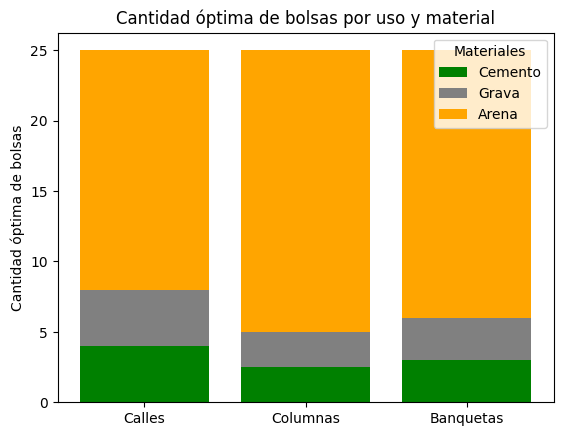

In [16]:
import matplotlib.pyplot as plt
import numpy as np

cantidades_calles = np.array([3.999999999870127, 3.9999999999343885, 16.99999999993915])
cantidades_columnas = np.array([2.4999999993420223, 2.499999999633408, 19.999999998787924])
cantidades_banquetas = np.array([2.999999984938938, 2.9999999999170046, 19.000000014813047])

colores = ['green', 'gray', 'orange']

fig, ax = plt.subplots()

ax.bar('Calles', cantidades_calles[0], color=colores[0], label='Cemento')
ax.bar('Calles', cantidades_calles[1], bottom=cantidades_calles[0], color=colores[1], label='Grava')
ax.bar('Calles', cantidades_calles[2], bottom=cantidades_calles[0] + cantidades_calles[1], color=colores[2], label='Arena')

ax.bar('Columnas', cantidades_columnas[0], color=colores[0])
ax.bar('Columnas', cantidades_columnas[1], bottom=cantidades_columnas[0], color=colores[1])
ax.bar('Columnas', cantidades_columnas[2], bottom=cantidades_columnas[0] + cantidades_columnas[1], color=colores[2])

ax.bar('Banquetas', cantidades_banquetas[0], color=colores[0])
ax.bar('Banquetas', cantidades_banquetas[1], bottom=cantidades_banquetas[0], color=colores[1])
ax.bar('Banquetas', cantidades_banquetas[2], bottom=cantidades_banquetas[0] + cantidades_banquetas[1], color=colores[2])

ax.set_ylabel('Cantidad óptima de bolsas')
ax.set_title('Cantidad óptima de bolsas por uso y material')
ax.legend(title='Materiales')
plt.show()



### Conclusiones ###
La solucion encontrada regresa el precio minimo de la compra, considerando que es minimo una tonelada de material, distribuidas en bolsas de 40kg. 
Considero, que la optimizacion no es del todo factible en la industria, ya que el valor regresado solo te permite obtener una unidad de concreto. Sin embargo, esta solucion te automatiza ciertos procesos, para encontrar rapidamente la cantidad de bolsas necesarias para una unidad de concreto.

### Referencias. ###
www.construyendo.com. (2018). CONCRETO - Dosificación concreto para diferentes resistencias. https://construyendo.co/concreto/index.php